In [3]:
import os
from glob import glob
import pandas as pd

import random
import pickle
import numpy as np
import ntpath


import cv2

from matplotlib import pyplot as plt

In [3]:
df_path = r"D:/deepfakes/dataframes_3dcnn/3dcnn_dataframe.csv"
df = pd.read_csv(df_path)

In [4]:
df

,real_image_folder,fake_image_folder
0,D:\deepfakes\training_real_faces\wynotylpnm,D:\deepfakes\training_fake_faces\owxbbpjpch
1,D:\deepfakes\training_real_faces\wclvkepakb,D:\deepfakes\training_fake_faces\htorvhbcae
2,D:\deepfakes\training_real_faces\vpmyeepbep,D:\deepfakes\training_fake_faces\fckxaqjbxk
3,D:\deepfakes\training_real_faces\jawgcggquk,D:\deepfakes\training_fake_faces\sphirandia
4,D:\deepfakes\training_real_faces\qarqtkvgby,D:\deepfakes\training_fake_faces\vsmadeuczx
...,...,...
99995,D:\deepfakes\training_real_faces\cnvquynriz,D:\deepfakes\training_fake_faces\uowiocuqqt
99996,D:\deepfakes\training_real_faces\moyljhcxok,D:\deepfakes\training_fake_faces\tnaeehpcnb
99997,D:\deepfakes\training_real_faces\ikebomnsiq,D:\deepfakes\training_fake_faces\pdooqxqfrm
99998,D:\deepfakes\training_real_faces\kudvvlgiff,D:\deepfakes\training_fake_faces\djjdcnhlma


In [5]:
row = df.iloc[100]

In [6]:
real_image_folder = row["real_image_folder"]
fake_image_folder = row["fake_image_folder"]

In [7]:
a = os.path.join(real_image_folder, '*.png')
all_real_images = glob(a)

In [8]:
all_real_images

['D:\\deepfakes\\training_real_faces\\rmuxlgsedw\\rmuxlgsedw_0.png',
 'D:\\deepfakes\\training_real_faces\\rmuxlgsedw\\rmuxlgsedw_100.png',
 'D:\\deepfakes\\training_real_faces\\rmuxlgsedw\\rmuxlgsedw_120.png',
 'D:\\deepfakes\\training_real_faces\\rmuxlgsedw\\rmuxlgsedw_140.png',
 'D:\\deepfakes\\training_real_faces\\rmuxlgsedw\\rmuxlgsedw_160.png',
 'D:\\deepfakes\\training_real_faces\\rmuxlgsedw\\rmuxlgsedw_180.png',
 'D:\\deepfakes\\training_real_faces\\rmuxlgsedw\\rmuxlgsedw_20.png',
 'D:\\deepfakes\\training_real_faces\\rmuxlgsedw\\rmuxlgsedw_200.png',
 'D:\\deepfakes\\training_real_faces\\rmuxlgsedw\\rmuxlgsedw_220.png',
 'D:\\deepfakes\\training_real_faces\\rmuxlgsedw\\rmuxlgsedw_240.png',
 'D:\\deepfakes\\training_real_faces\\rmuxlgsedw\\rmuxlgsedw_260.png',
 'D:\\deepfakes\\training_real_faces\\rmuxlgsedw\\rmuxlgsedw_280.png',
 'D:\\deepfakes\\training_real_faces\\rmuxlgsedw\\rmuxlgsedw_40.png',
 'D:\\deepfakes\\training_real_faces\\rmuxlgsedw\\rmuxlgsedw_60.png',
 'D:\\deepf

In [37]:
import re
def get_video_extracted_identifiers(paths):
    video_identifiers = []
    for path in paths:
        match = re.search('_(\d+)', path)
        if match:
            video_identifiers.append(int(match.group(1)))
            
    return video_identifiers

In [40]:


folder_to_identifiers = dict()
for i in range(0, 100000):
    row = df.iloc[i]
    image_folder = row["fake_image_folder"]
    if image_folder in folder_to_identifiers:
        continue
    glob_string = os.path.join(image_folder, '*.png')
    all_image_paths = glob(glob_string)
    folder_to_identifiers[image_folder] = sorted(get_video_extracted_identifiers(all_image_paths))
    
f = open("fake_folder_to_identifiers.pkl","wb")
pickle.dump(folder_to_identifiers,f)
f.close()

In [15]:
randrange(40, 140, 20)

60

In [17]:
identifiers = [60, 80, 100, 120, 140]
example = all_real_images[0]

In [22]:
b = [os.path.join(real_image_folder, '_{}.png'.format(id)) for id in identifiers]

In [23]:
b

['D:\\deepfakes\\training_real_faces\\rmuxlgsedw\\_60.png',
 'D:\\deepfakes\\training_real_faces\\rmuxlgsedw\\_80.png',
 'D:\\deepfakes\\training_real_faces\\rmuxlgsedw\\_100.png',
 'D:\\deepfakes\\training_real_faces\\rmuxlgsedw\\_120.png',
 'D:\\deepfakes\\training_real_faces\\rmuxlgsedw\\_140.png']

In [41]:
len(folder_to_identifiers)

100000

In [42]:

example = r"D:\deepfakes\training_real_faces\wynotylpnm"
print(ntpath.basename(example))

wynotylpnm


In [45]:
example = folder_to_identifiers[r"D:\deepfakes\training_fake_faces\owxbbpjpch"]

In [10]:
example = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280]

In [11]:
image_folder = r"D:\deepfakes\training_fake_faces\owxbbpjpch"

def load_img(track_path, idx):
    full_image_path = track_path + "_{}.png".format(idx)
    img = cv2.imread(full_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(img.shape)

    return img


if len(example) > 10:
    indices = example[4:9]
    prefix = ntpath.basename(image_folder)
    full_prefix = os.path.join(image_folder, prefix)
    sequence = np.stack([load_img(full_prefix, identifier) for identifier in indices])

(297, 196, 3)
(298, 183, 3)
(319, 201, 3)
(303, 201, 3)
(286, 186, 3)


ValueError: all input arrays must have the same shape

In [12]:
from albumentations import (
    HorizontalFlip, GaussianBlur, HueSaturationValue, DualTransform, GaussNoise, OneOf,
    Compose, RandomBrightnessContrast, ImageCompression, ShiftScaleRotate,
    PadIfNeeded, ToGray, FancyPCA, MotionBlur, RandomCrop, VerticalFlip
)

def isotropically_resize_image(img, size, interpolation_down=cv2.INTER_AREA, interpolation_up=cv2.INTER_CUBIC):
    h, w = img.shape[:2]
    if max(w, h) == size:
        return img
    if w > h:
        scale = size / w
        h = h * scale
        w = size
    else:
        scale = size / h
        w = w * scale
        h = size
    interpolation = interpolation_up if scale > 1 else interpolation_down
    resized = cv2.resize(img, (int(w), int(h)), interpolation=interpolation)
    return resized


class IsotropicResize(DualTransform):
    def __init__(self, max_side, interpolation_down=cv2.INTER_AREA, interpolation_up=cv2.INTER_CUBIC,
                 always_apply=False, p=1):
        super(IsotropicResize, self).__init__(always_apply, p)
        self.max_side = max_side
        self.interpolation_down = interpolation_down
        self.interpolation_up = interpolation_up

    def apply(self, img, interpolation_down=cv2.INTER_AREA, interpolation_up=cv2.INTER_CUBIC, **params):
        return isotropically_resize_image(img, size=self.max_side, interpolation_down=interpolation_down,
                                          interpolation_up=interpolation_up)


def augmentation_pipeline(size_height=224, size_width=192):
    return Compose([
        ImageCompression(quality_lower=60, quality_upper=100, p=0.5),
        GaussianBlur(blur_limit=3, p=0.05),
        MotionBlur(p=0.05),
        HorizontalFlip(),
        OneOf([
            IsotropicResize(max_side=size_height, interpolation_down=cv2.INTER_AREA, interpolation_up=cv2.INTER_CUBIC),
            IsotropicResize(max_side=size_height, interpolation_down=cv2.INTER_AREA, interpolation_up=cv2.INTER_LINEAR),
            IsotropicResize(max_side=size_height, interpolation_down=cv2.INTER_LINEAR, interpolation_up=cv2.INTER_LINEAR),
        ], p=1),
        PadIfNeeded(min_height=size_height, min_width=size_width, border_mode=cv2.BORDER_CONSTANT),
        OneOf([RandomBrightnessContrast(), FancyPCA(), HueSaturationValue()], p=0.7),
        ToGray(p=0.2),
        ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=10, border_mode=cv2.BORDER_CONSTANT, p=0.5)],
    )

In [13]:
prev_state = random.getstate()
indices = example[4:9]
print(indices)
prefix = ntpath.basename(image_folder)
print(prefix)
full_prefix = os.path.join(image_folder, prefix)
print(full_prefix)

[80, 100, 120, 140, 160]
owxbbpjpch
D:\deepfakes\training_fake_faces\owxbbpjpch\owxbbpjpch


In [14]:
img1 = load_img(full_prefix, indices[0])
img2 = load_img(full_prefix, indices[1])
img3 = load_img(full_prefix, indices[2])
img4 = load_img(full_prefix, indices[3])
img5 = load_img(full_prefix, indices[4])
images = [img1, img2, img3, img4, img5]

(297, 196, 3)
(298, 183, 3)
(319, 201, 3)
(303, 201, 3)
(286, 186, 3)


C:\Users\Augustas\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  after removing the cwd from sys.path.


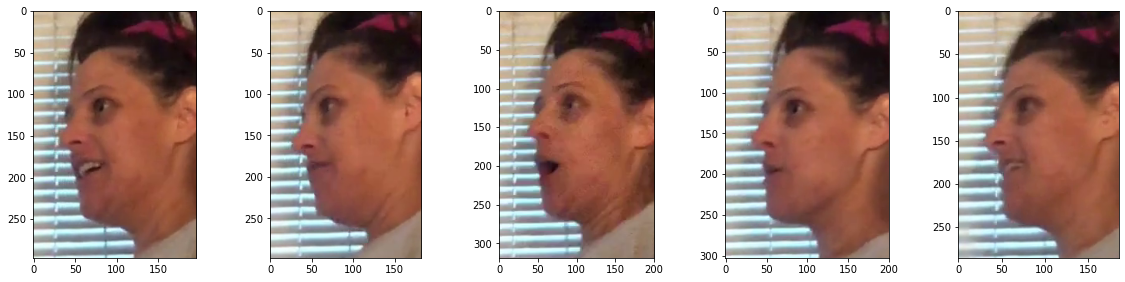

In [15]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [16]:
transformation = augmentation_pipeline()
transformed_images = []
for img in images:
    image_transformed = transformation(image=img)["image"]
    transformed_images.append(image_transformed)

C:\Users\Augustas\AppData\Roaming\Python\Python36\site-packages\albumentations\augmentations\transforms.py:2611: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  "blur_limit and sigma_limit minimum value can not be both equal to 0. "


C:\Users\Augustas\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  after removing the cwd from sys.path.


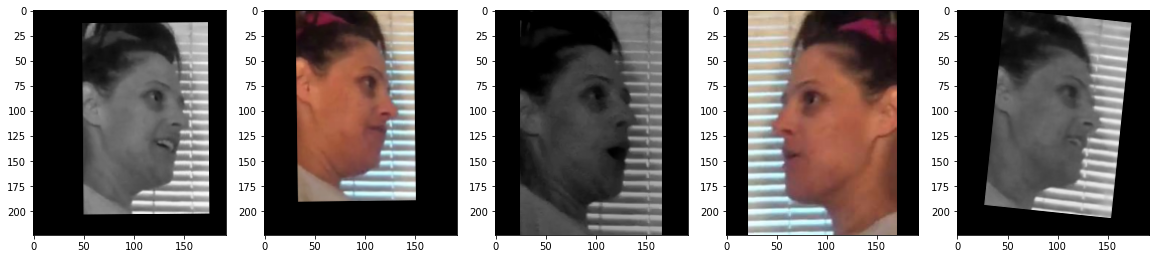

In [17]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(transformed_images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [18]:
for img in transformed_images:
    print(img.shape)

(224, 192, 3)
(224, 192, 3)
(224, 192, 3)
(224, 192, 3)
(224, 192, 3)


In [19]:
gaussian_noise_transform = Compose([
        GaussNoise(p=1)],
    )

C:\Users\Augustas\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  del sys.path[0]


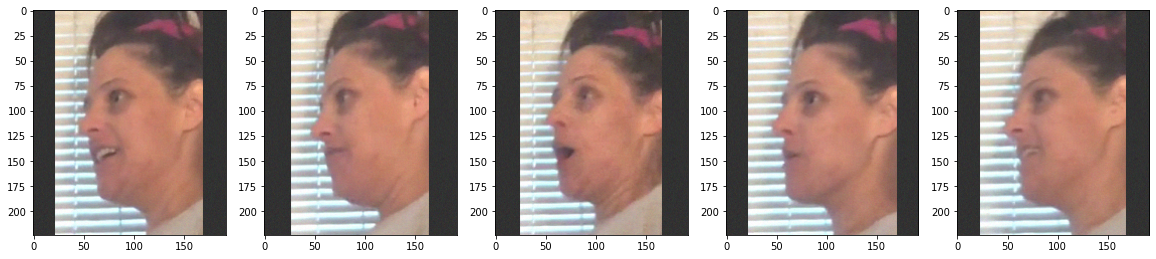

In [29]:
transformed_images = []
prev_state = random.getstate()

for img in images:
    random.setstate(prev_state)
    image_transformed = transformation(image=img)["image"]
    image_transformed = gaussian_noise_transform(image=image_transformed)["image"]
    transformed_images.append(image_transformed)
    
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(transformed_images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [85]:
stack = np.stack(transformed_images)

In [86]:
stack.shape

(5, 224, 192, 3)

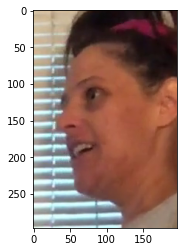

In [112]:
plt.imshow(images[0])

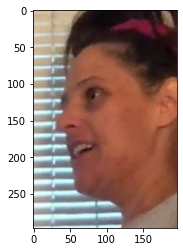

In [114]:
plt.imshow(gaussian_noise_transform(image=images[0])["image"])

In [115]:
a= images[0]
b = gaussian_noise_transform(image=images[0])["image"]

In [116]:
np.array_equal(a,b)

False

## Do the same for testing dataset

In [4]:
df_path = r"D:/deepfakes/dataframes_3dcnn/3dtesting_dataframe.csv"
df = pd.read_csv(df_path)

In [5]:
import re
def get_video_extracted_identifiers(paths):
    video_identifiers = []
    for path in paths:
        match = re.search('_(\d+)', path)
        if match:
            video_identifiers.append(int(match.group(1)))
            
    return video_identifiers

In [6]:
folder_to_identifiers = dict()
for i in range(4000):
    row = df.iloc[i]
    image_folder = row["faces_folder"]
    if image_folder in folder_to_identifiers:
        continue
    glob_string = os.path.join(image_folder, '*.png')
    all_image_paths = glob(glob_string)
    folder_to_identifiers[image_folder] = sorted(get_video_extracted_identifiers(all_image_paths))
    
f = open("testing_folder_to_identifiers.pkl","wb")
pickle.dump(folder_to_identifiers, f)
f.close()

In [7]:
folder_to_identifiers

{'D:\\deepfakes\\validation_faces\\4000': [0,
  20,
  40,
  60,
  80,
  100,
  120,
  140,
  160,
  180,
  200,
  220,
  240,
  260,
  280,
  300],
 'D:\\deepfakes\\validation_faces\\4001': [0,
  20,
  40,
  60,
  80,
  100,
  120,
  140,
  160,
  180,
  200,
  220,
  240,
  260,
  280],
 'D:\\deepfakes\\validation_faces\\4002': [0,
  20,
  40,
  60,
  80,
  100,
  120,
  140,
  160,
  180,
  200,
  220,
  240,
  260,
  280],
 'D:\\deepfakes\\validation_faces\\4003': [0,
  20,
  40,
  60,
  80,
  100,
  120,
  140,
  160,
  180,
  200,
  220,
  240,
  260,
  280,
  300],
 'D:\\deepfakes\\validation_faces\\4004': [0,
  20,
  40,
  60,
  80,
  100,
  120,
  140,
  160,
  180,
  200,
  220,
  240,
  260,
  280],
 'D:\\deepfakes\\validation_faces\\4005': [0,
  20,
  40,
  60,
  80,
  100,
  120,
  140,
  160,
  180,
  200,
  220,
  240,
  260,
  280],
 'D:\\deepfakes\\validation_faces\\4006': [0,
  20,
  40,
  60,
  80,
  100,
  120,
  140,
  160,
  180,
  200,
  220,
  240,
  260,
  280],

In [8]:
folder_to_identifiers[r'D:\deepfakes\validation_faces\7999']

[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280]